### KC, Programowanie, lab 12, PZO cz2
**start 13:47**

In [13]:
import math

xa, ya = 0, 0  
xb, yb = 2, 2  

a = xb - xa
b = yb - ya

# tg(alfa) = b / a
# alfa = arctg (b / a)

# kąt między wektorem a osią X
print('radian', math.atan(b / a))
print('stopnie', math.atan(b / a) * 180 / math.pi)
print('stopnie z math', math.degrees(math.atan(b / a)))

radian 0.7853981633974483
stopnie 45.0
stopnie z math 45.0


### `Rakieta`
Wracamy do klasy `Rakieta`. Może ona robić różne rzeczy, ale przede wszystkim jest obiektem latającym. Może mieć kilka ciekawych i typowych dla rakiet atrybutów: waga, ilość paliwa, położenie, prędkość... Pewnie i więcej, ale proszę sobie wyobrazić coś takiego:

```
 ∧
 |
 |               ∧
 |              / \
y|--------------|o|  pozycja = (x, y)
 |              | |
 |               ᚄ
 |               |
 |               |
 +-------------------------->
                 x
```

Zapomnimy o większości problemów z rakietami i ograniczymy się do latania rakietą. Będziemy po prostu opisywać, jak na obrazku powyżej **położenie rakiety** w układzie kartezjańskim. 

Zaczniemy krok po kroku, od najprostszej realizacji klasy Rakieta

In [2]:
class Rakieta:
    '''Rakieta'''
    
    def __init__(self, pozycja=(0, 0)):
        self.pozycja = pozycja
        
    def get_pozycja(self):
        return self.pozycja
    
    def set_pozycja(self, var):
        'ustaw var jako nową wartość pozycji'
        self.pozycja = var
        
    def __repr__(self):
        return f'Rakieta na pozycji {self.get_pozycja()}'
    
    def __str__(self):
        return self.__repr__()

In [3]:
r = Rakieta()
print(r)

Rakieta na pozycji (0, 0)


### Ćwiczenie 1
Na bazie klasy `Rakieta` zbuduj klasę

1. `Bocian` - Bartosz
* `Kruk` - Igor
* `Czapla` - Marcin
* `Koliber` - Paulina
* `Papuga` - Taisja

Takie klasy też będą latać, jak powyższa rakieta. Dodaj 1 argument `__init__` wyróżniający swoją klasę np: kolor, wagę. Przypisz go do atrybutu instancji (`self`), dodaj setter i getter.

In [22]:
class Rakieta:
    '''Rakieta'''
    
    def __init__(self, pozycja=(0, 0)):
        self.pozycja = pozycja
        
    def get_pozycja(self):
        return self.pozycja
    
    def set_pozycja(self, nowa_pozycja):
        'ustaw var jako nową wartość pozycji'
        assert isinstance(nowa_pozycja, (tuple, list)), 'pozycja powinna być listą/krotką'
        assert len(nowa_pozycja) == 2, 'pozycja powinna mieć 2 elementy'
        assert isinstance(nowa_pozycja[0], (int, float)), '1 element pozycji ma być liczbą'
        assert isinstance(nowa_pozycja[1], (int, float)), '2 element pozycji ma być liczbą'     
        assert nowa_pozycja[1] >= 0, 'drugi element pozycji >= 0'
        self.pozycja = nowa_pozycja
        
    def __repr__(self):
        return f'Rakieta na pozycji {self.get_pozycja()}'
    
    def __str__(self):
        return self.__repr__()

### Ćwiczenie 2
Zmodyfikuj settery swojej klasy w podobny sposób do powyższego.

In [23]:
r = Rakieta((3, 4))
print(r)

r.set_pozycja((10, 20))
print(r)

try: 
    r.set_pozycja(23)
    print(r)
except AssertionError as e:
    print(e)

Rakieta na pozycji (3, 4)
Rakieta na pozycji (10, 20)
pozycja powinna być listą/krotką


### Ćwiczenie 3
Zmodyfikuj `__init__` swojej klasy w podobny sposób do powyższego dla obu atrybutów.

In [57]:
class Rakieta:
    '''Rakieta'''
    
    def __init__(self, pozycja=(0, 0)):
        self.set_pozycja(pozycja)
    
    def sprawdz_pozycje(pozycja):  # NIE MA self !!!
        assert isinstance(pozycja, (tuple, list)), 'pozycja powinna być listą/krotką'
        assert len(pozycja) == 2, 'pozycja powinna mieć 2 elementy'
        assert isinstance(pozycja[0], (int, float)), '1 element pozycji ma być liczbą'
        assert isinstance(pozycja[1], (int, float)), '2 element pozycji ma być liczbą'     
        assert pozycja[1] >= 0, 'drugi element pozycji >= 0'
    
    def get_pozycja(self):
        return self.pozycja
    
    def set_pozycja(self, nowa_pozycja):
        'ustaw var jako nową wartość pozycji'
        Rakieta.sprawdz_pozycje(nowa_pozycja)  # __class__.sprawdz_pozycje(nowa_pozycja)
        self.pozycja = nowa_pozycja
        
    def __repr__(self):
        return f'Rakieta na pozycji {self.get_pozycja()}'
    
    def __str__(self):
        return self.__repr__()

In [56]:
r = Rakieta((1, 10))
print(r)

Rakieta na pozycji (1, 10)


### Ćwiczenie 4
Dopisz funkcje klas `sprawdz_AAA` dla atrybutów klasy. Wykorzystaj odwołanie `__class__.sprawdz_AAA` w setterach.

In [43]:
try:
    r.set_pozycja((23, 'a'))
except:
    print('coś nie tak')

coś nie tak


In [46]:
Rakieta.sprawdz_pozycje((1, "1"))

AssertionError: 2 element pozycji ma być liczbą

In [58]:
class Rakieta:
    '''Rakieta'''
    
    def __init__(self, pozycja=(0, 0)):
        self.set_pozycja(pozycja)
    
    def sprawdz_pozycje(pozycja):  # NIE MA self !!!
        assert isinstance(pozycja, (tuple, list)), 'pozycja powinna być listą/krotką'
        assert len(pozycja) == 2, 'pozycja powinna mieć 2 elementy'
        assert isinstance(pozycja[0], (int, float)), '1 element pozycji ma być liczbą'
        assert isinstance(pozycja[1], (int, float)), '2 element pozycji ma być liczbą'     
        assert pozycja[1] >= 0, 'drugi element pozycji >= 0'
    
    def get_pozycja(self):
        return self.pozycja
    
    def set_pozycja(self, nowa_pozycja):
        'ustaw var jako nową wartość pozycji'
        Rakieta.sprawdz_pozycje(nowa_pozycja)  # __class__.sprawdz_pozycje(nowa_pozycja)
        self.pozycja = nowa_pozycja
        
    def przesun_rakiete(self, przesuniecie):
        x, y = self.get_pozycja()  # czytaj pozycję
        dx, dy = przesuniecie  # czytaj przesuniecie
        nowa_pozycja = (x + dx, y + dy)  # oblicz nowa pozycje
        self.set_pozycja(nowa_pozycja)  # ustaw nową pozycję
        
    def __repr__(self):
        return f'Rakieta na pozycji {self.get_pozycja()}'
    
    def __str__(self):
        return self.__repr__()

### Ćwiczenie 5
Dopisz lekko abstrakcyjną funkcję `przelec(self, ruch)` do swojej ptasiej klasy.

In [62]:
r = Rakieta()
print(r)

r.przesun_rakiete((1, 1))
print(r)

r.przesun_rakiete((1, 1))
print(r)

r.przesun_rakiete((-2, 4))
print(r)

Rakieta na pozycji (0, 0)
Rakieta na pozycji (1, 1)
Rakieta na pozycji (2, 2)
Rakieta na pozycji (0, 6)


In [64]:
try:
    r.przesun_rakiete((3, -8))
except:
    print('cos nie tak')

cos nie tak


In [73]:
class Rakieta:
    '''Rakieta'''
    
    def __init__(self, pozycja=(0, 0)):
        self.set_pozycja(pozycja)
    
    def sprawdz_pozycje(pozycja):  # NIE MA self !!!
        assert isinstance(pozycja, (tuple, list)), 'pozycja powinna być listą/krotką'
        assert len(pozycja) == 2, 'pozycja powinna mieć 2 elementy'
        assert isinstance(pozycja[0], (int, float)), '1 element pozycji ma być liczbą'
        assert isinstance(pozycja[1], (int, float)), '2 element pozycji ma być liczbą'     
        assert pozycja[1] >= 0, 'drugi element pozycji >= 0'
    
    def get_pozycja(self):
        return self.pozycja
    
    def set_pozycja(self, nowa_pozycja):
        'ustaw var jako nową wartość pozycji'
        Rakieta.sprawdz_pozycje(nowa_pozycja)  # __class__.sprawdz_pozycje(nowa_pozycja)
        self.pozycja = nowa_pozycja
        
    def przesun_rakiete(self, przesuniecie):
        x, y = self.get_pozycja()  # czytaj pozycję
        dx, dy = przesuniecie  # czytaj przesuniecie
        nowa_pozycja = (x + dx, y + dy)  # oblicz nowa pozycje
        self.set_pozycja(nowa_pozycja)  # ustaw nową pozycję
        
    def w_gore(self, gora):
        self.przesun_rakiete((0, gora))
        
    def w_dol(self, dol):
        self.przesun_rakiete((0, -dol))
        
    def w_prawo(self, prawo):
        self.przesun_rakiete((prawo, 0))
        
    def w_lewo(self, lewo):
        self.przesun_rakiete((-lewo, 0))
        
    def laduj(self):
        x, y = self.get_pozycja()
        self.set_pozycja((x, 0))
        
    def __repr__(self):
        return f'Rakieta na pozycji {self.get_pozycja()}'
    
    def __str__(self):
        return self.__repr__()

In [74]:
r = Rakieta()
print(r)

r.w_gore(100)
print(r)

r.w_dol(20)
print(r)

r.w_lewo(20)
print(r)

Rakieta na pozycji (0, 0)
Rakieta na pozycji (0, 100)
Rakieta na pozycji (0, 80)
Rakieta na pozycji (-20, 80)


[(0, 0), (0, 10), (0, 2), (16, 12), (94, 22), (127, 24), (56, 29), (64, 27), (-10, 37), (-78, 30), (2, 34), (-97, 39), (-97, 0)]


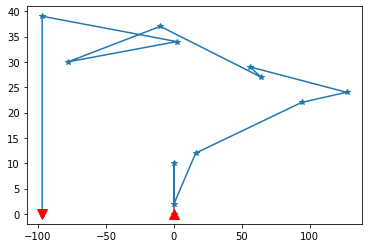

In [75]:
import random

rakieta = Rakieta()
pozycja = []
pozycja.append(rakieta.get_pozycja())

# start pionowy
rakieta.w_gore(10)
pozycja.append(rakieta.get_pozycja())

ilosc_skokow = 10
for i in range(ilosc_skokow):
    # góra czy dół?
    dy = random.randint(0, 10)
    if random.random() > 0.5:
        rakieta.w_gore(dy)
    else:
        try:
            rakieta.w_dol(dy)
        except:
            pass
    
    # lewo czy prawo?
    dx = random.randint(0, 100)
    if random.random() > 0.5:
        rakieta.w_prawo(dx)
    else:
        rakieta.w_lewo(dx)
    
    pozycja.append(rakieta.get_pozycja())
    
#lądujemy
rakieta.laduj()
pozycja.append(rakieta.get_pozycja())
print(pozycja)

### Odkomentuj jeżeli chcesz zobaczyć jak latała rakieta...
import pylab
%matplotlib inline
x, y = zip(*pozycja)
pylab.plot(x, y, '*-')
pylab.plot(x[:1], y[:1], '^r', markersize=10)
pylab.plot(x[-1:], y[-1:], 'vr', markersize=10)